In [5]:
pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=3100c2f4dcf130c4c208c2a8d36f3937b72df5ae22db8c65ca8d26e5a29f5aff
  Stored in directory: /private/var/folders/v0/g78xks6s1mbbr0_zx7twt2cr0000gn/T/pip-ephem-wheel-cache-arthpll1/wheels/28/79/3c/08a301b673366fe664fe2853e136eb2acc1bb752045c11c6a1
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=1c3ea4a26d62b75e57ba469f94092443686e0bbea9dcff0960f3b84fe8b02db2
  Stored in directory: /private/var/folders/v0/g78xks6s1mbbr0_zx7twt2cr0000gn/T/pip-ephem-wheel-cache-arthpll1/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [6]:
# LinearRegression is a machine learning library for linear regression
 
from sklearn.linear_model import LinearRegression 

# pandas and numpy are used for data manipulation 

import pandas as pd 
import numpy as np 

# matplotlib and seaborn are used for plotting graphs 

import matplotlib.pyplot as plt 
import seaborn 

# fix_yahoo_finance is used to fetch data import fix_yahoo_finance as yf

import yfinance as yf

[*********************100%***********************]  1 of 1 completed


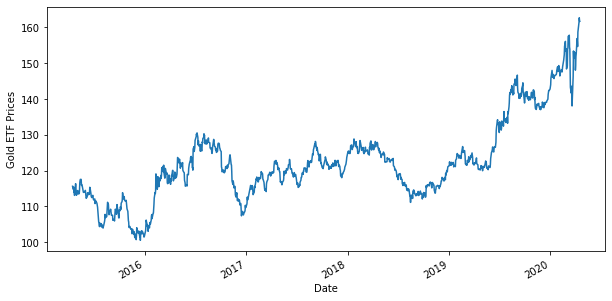

In [7]:
# Read data 

Df = yf.download('GLD','2015-04-17','2020-04-17')

# Only keep close columns 

Df=Df[['Close']] 

# Drop rows with missing values 

Df= Df.dropna() 

# Plot the closing price of GLD 

Df.Close.plot(figsize=(10,5)) 

plt.ylabel("Gold ETF Prices")

plt.show()

In [35]:
Df.head(5)

,Close,S_3,S_9
Date,,,
2015-04-30,113.470001,115.723335,114.934446
2015-05-01,113.080002,115.103335,114.697779
2015-05-04,114.099998,114.020002,114.515557
2015-05-05,114.419998,113.550001,114.373335
2015-05-06,114.360001,113.866666,114.438890


In [8]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean()
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean()
Df= Df.dropna()
X = Df[['S_3','S_9']]
X.head()

,S_3,S_9
Date,,
2015-04-30,115.723335,114.934446
2015-05-01,115.103335,114.697779
2015-05-04,114.020002,114.515557
2015-05-05,113.550001,114.373335
2015-05-06,113.866666,114.438890


In [9]:
y = Df['Close']
y.head()

Date
2015-04-30    113.470001
2015-05-01    113.080002
2015-05-04    114.099998
2015-05-05    114.419998
2015-05-06    114.360001
Name: Close, dtype: float64

In [10]:
t=.8 
t = int(t*len(Df)) 

# Train dataset 

X_train = X[:t] 
y_train = y[:t]  

# Test dataset 

X_test = X[t:] 
y_test = y[t:]

In [29]:
linear = LinearRegression().fit(X_train,y_train)

In [32]:
print("Gold ETF Price =",round(linear.coef_[0],2),"* 3 Days Moving Average -",round(linear.coef_[1],2),"* 9 Days Moving Average + ",round(linear.intercept_,2)) 

Gold ETF Price = 1.25 * 3 Days Moving Average - -0.26 * 9 Days Moving Average +  1.94


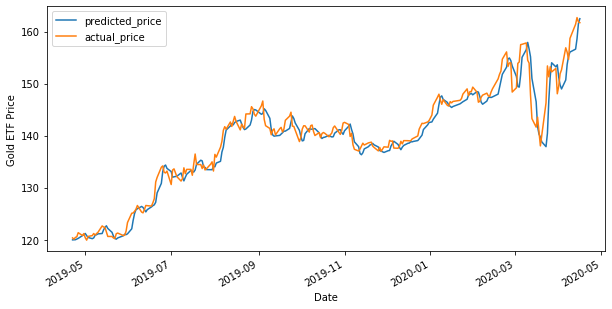

In [33]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  

y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Gold ETF Price")  
plt.show()

In [34]:
r2_score = linear.score(X[t:],y[t:])*100  

float("{0:.2f}".format(r2_score))

95.45

[*********************100%***********************]  1 of 1 completed


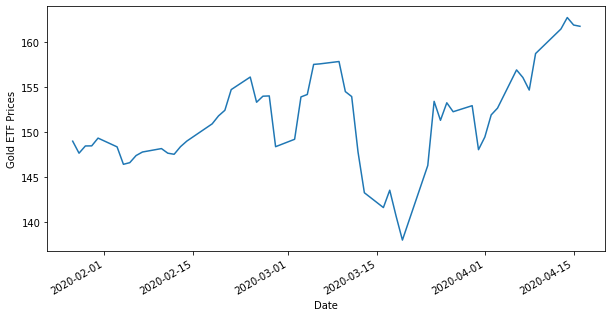

In [41]:
xau = yf.download('GLD','2020-01-27','2020-04-17')
xau=xau[['Close']] 
xau= xau.dropna() 
xau.Close.plot(figsize=(10,5)) 
plt.ylabel("Gold ETF Prices")
plt.show()

In [44]:
xau['S_3'] = xau['Close'].shift(1).rolling(window=3).mean()
xau['S_9']= xau['Close'].shift(1).rolling(window=9).mean()
xau= xau.dropna()
X = xau[['S_3','S_9']]
y = xau['Close']
y.head()

Date
2020-02-21    154.699997
2020-02-24    156.089996
2020-02-25    153.300003
2020-02-26    153.970001
2020-02-27    154.000000
Name: Close, dtype: float64

In [43]:
X.head(5)

,S_3,S_9
Date,,
2020-02-07,146.813329,147.967779
2020-02-10,147.266663,147.834444
2020-02-11,147.786662,147.891110
2020-02-12,147.873332,147.802221
2020-02-13,147.789998,147.698886


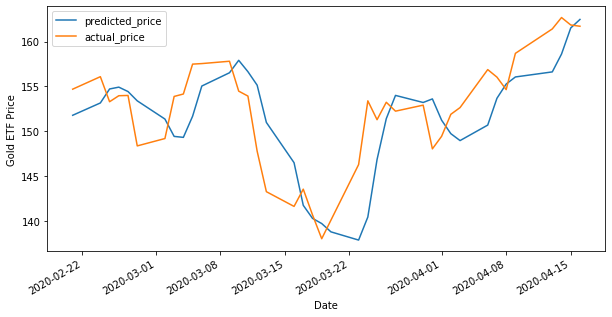

In [47]:
predicted_price = linear.predict(X)  
predicted_price = pd.DataFrame(predicted_price,index=y.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  

y.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Gold ETF Price")  
plt.show()

In [50]:
r1_score = linear.score(X,y)*100  

float("{0:.2f}".format(r1_score))

51.09

In [ ]:
for i in range(y):
    while i.index>9
    i = 1.25 * 3 Days Moving Average - -0.26 * 9 Days Moving Average +  1.94